In [1]:
%load_ext autoreload
%autoreload 1

import sys
import os

# This adds 'code/' to sys.path
code_dir = os.path.abspath(os.path.dirname(__file__)) if '__file__' in globals() else os.path.abspath('')
if code_dir not in sys.path:
    sys.path.append(code_dir)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt

# Example of using the class

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Defining the Runge function
def f(x):
    return 1/(1+25*x**2)

n = 100
x = np.random.uniform(-1, 1, n)
y = f(x) + 0.01*np.random.normal(0, 1, n)

p = 5
X = PolynomialFeatures(p).fit_transform(x.reshape(-1, 1))
num_features = X.shape[1]

In [5]:
def MSE_gradient(X: npt.NDArray[np.floating], y: npt.NDArray[np.floating], theta: npt.NDArray[np.floating]):
    n = X.shape[0]
    return (2.0 / n) * X.T @ (X @ theta - y)

In [11]:
%aimport methods.training_methods, methods.step_methods
from methods.training_methods import GradientDescent
from methods.step_methods import ConstantGradientStep, MomentumGradientStep, ADAgradStep, RMSpropStep

In [67]:
np.random.seed(1234)
theta = np.random.uniform(-1, 1, num_features)
iterations = 1000

gd_constant = GradientDescent(X, y, gradient_function=MSE_gradient, starting_parameters=theta, step_method=ConstantGradientStep(learning_rate=0.02))
gd_momentum = GradientDescent(X, y, gradient_function=MSE_gradient, starting_parameters=theta, step_method=MomentumGradientStep(learning_rate=0.02, momentum=0.7))
gd_ADAgrad = GradientDescent(X, y, gradient_function=MSE_gradient, starting_parameters=theta, step_method=ADAgradStep(learning_rate=0.2))
gd_RMSprop = GradientDescent(X, y, gradient_function=MSE_gradient, starting_parameters=theta, step_method=RMSpropStep(learning_rate=0.007, decay_rate=0.9))


mse_data_gd_constant_step = gd_constant.train(iterations=iterations, store_mse=True)
mse_data_gd_momentum = gd_momentum.train(iterations=iterations, store_mse=True)
mse_data_gd_ADAgrad = gd_ADAgrad.train(iterations=iterations, store_mse=True)
mse_data_gd_RMSprop = gd_RMSprop.train(iterations=iterations, store_mse=True)

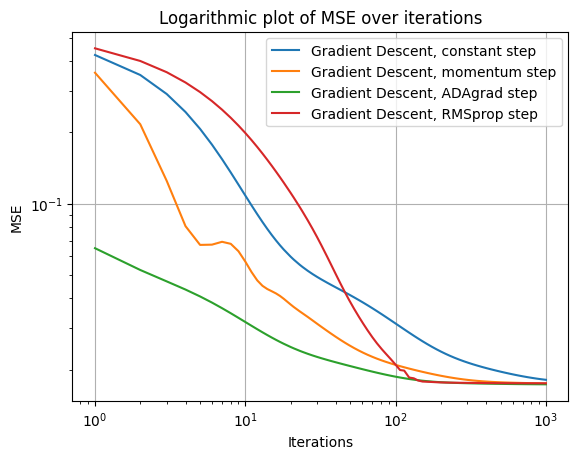

In [68]:
plt.plot(mse_data_gd_constant_step[0], mse_data_gd_constant_step[1], label='Gradient Descent, constant step')
plt.plot(mse_data_gd_momentum[0], mse_data_gd_momentum[1], label='Gradient Descent, momentum step')
plt.plot(mse_data_gd_ADAgrad[0], mse_data_gd_ADAgrad[1], label='Gradient Descent, ADAgrad step')
plt.plot(mse_data_gd_RMSprop[0], mse_data_gd_RMSprop[1], label='Gradient Descent, RMSprop step')



plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Logarithmic plot of MSE over iterations")
plt.loglog()
# plt.xscale("log")
# plt.yscale("log")
plt.grid()
plt.legend()
plt.show()

0.017721548539950477
0.018844446396692652
0.0207159753653981
0.023336249592164817
0.026705194459484473


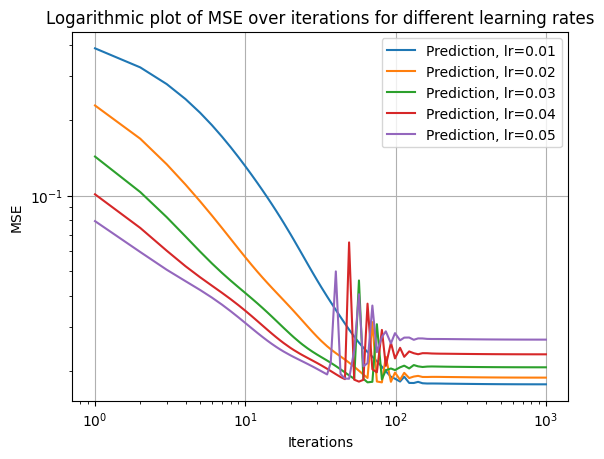

In [56]:
for learning_rate in np.linspace(0.01, 0.05, 5):
    gd_RMSprop = GradientDescent(X, y, gradient_function=MSE_gradient, starting_parameters=theta, step_method=RMSpropStep(learning_rate=learning_rate, decay_rate=0.9))
    mse = gd_RMSprop.train(iterations=1000, store_mse=True)
    plt.plot(mse[0], mse[1], label=f'Prediction, lr={learning_rate}')
    print(mse[1][-1])
plt.xlabel("Iterations")
plt.ylabel("MSE")	
plt.title("Logarithmic plot of MSE over iterations for different learning rates")
plt.loglog()
plt.grid()
plt.legend()
plt.show()

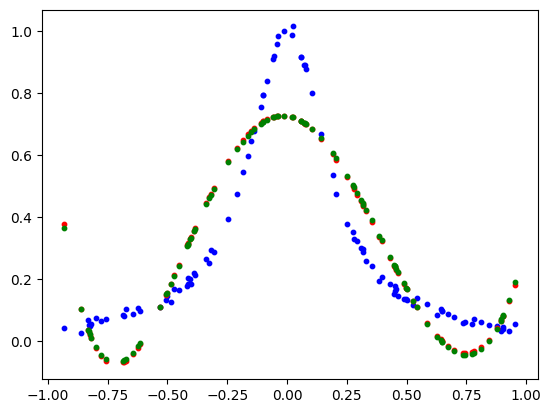

In [9]:
y_pred = gd_constant.predict(X)
y_pred_momentum = gd_momentum.predict(X)
plt.scatter(x, y, label='Data', color='blue', s=10)

plt.scatter(x, y_pred, label='Prediction', color='red', s=10)
plt.scatter(x, y_pred_momentum, label='Prediction, momentum', color='green', s=10)